
#Tarefa de aprofundamento - trilha 4 - Luisa Centofanti - 92101399

In [ ]:
#importando bibliotecas
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [ ]:
#acurácia
def display_acc_hist(history):
  history_df = pd.DataFrame(history.history)
  display(history_df.head())
  # Start the plot at epoch 0
  history_df.loc[0:, ['loss', 'val_loss']].plot()
  history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()

  print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))
  return

def display_binary_acc_hist(history):
  history_df = pd.DataFrame(history.history)
  display(history_df.head())
  # Start the plot at epoch 0
  history_df.loc[0:, ['loss', 'val_loss']].plot()
  history_df.loc[0:, ['binary_accuracy', 'val_binary_accuracy']].plot()

  print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))
  return



def print_results(y_test, y_pred):
  print('Matriz de Confusão: \n' , confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  print('Acuracidade: ' , accuracy_score(y_test, y_pred))
  return

A base de dados escolhida foi sobre a potabilidade da água


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving water_potability.csv to water_potability.csv


In [ ]:
# importando io para carregar o arquivo
import io

In [ ]:
# comando para importar arquivo CSV: read_csv e salvar os dados 
data = pd.read_csv(io.BytesIO(uploaded['water_potability.csv']))

In [ ]:
#mostrar base de dados
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
# mostrando informações do data, ou seja, do conjunto de dados importado
data.info

<bound method DataFrame.info of             ph    Hardness  ...  Turbidity  Potability
0          NaN  204.890455  ...   2.963135           0
1     3.716080  129.422921  ...   4.500656           0
2     8.099124  224.236259  ...   3.055934           0
3     8.316766  214.373394  ...   4.628771           0
4     9.092223  181.101509  ...   4.075075           0
...        ...         ...  ...        ...         ...
3271  4.668102  193.681735  ...   4.435821           1
3272  7.808856  193.553212  ...   2.798243           1
3273  9.419510  175.762646  ...   3.298875           1
3274  5.126763  230.603758  ...   4.708658           1
3275  7.874671  195.102299  ...   2.309149           1

[3276 rows x 10 columns]>

In [ ]:
print("Variáveis:\t{}\nEntradas:\t{}".format(data.shape[1], data.shape[0]))

Variáveis:	10
Entradas:	3276


In [ ]:
display(data.dtypes)
display(data.head())

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
#porcentagem de faltantes
(data.isnull().sum() / data.shape[0]).sort_values(ascending=False)

Sulfate            0.238400
ph                 0.149878
Trihalomethanes    0.049451
Potability         0.000000
Turbidity          0.000000
Organic_carbon     0.000000
Conductivity       0.000000
Chloramines        0.000000
Solids             0.000000
Hardness           0.000000
dtype: float64

In [ ]:
# substituindo os zeros e faltantes das colunas
cols = ['Sulfate', 'ph', 'Trihalomethanes']
data [cols] = data [cols] .replace (0, np.nan)

# eliminando todas as linhas com na nas colunas mencionadas acima na lista.
data.dropna (subset = cols, inplace = True)
data.shape
display(data.head())

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [ ]:
#porcentagem de faltantes de novo, ver se está ok
(data.isnull().sum() / data.shape[0]).sort_values(ascending=False)

Potability         0.0
Turbidity          0.0
Trihalomethanes    0.0
Organic_carbon     0.0
Conductivity       0.0
Sulfate            0.0
Chloramines        0.0
Solids             0.0
Hardness           0.0
ph                 0.0
dtype: float64

In [ ]:
display(data.dtypes)
display(data.head())

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [ ]:
#distribuição estatística
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


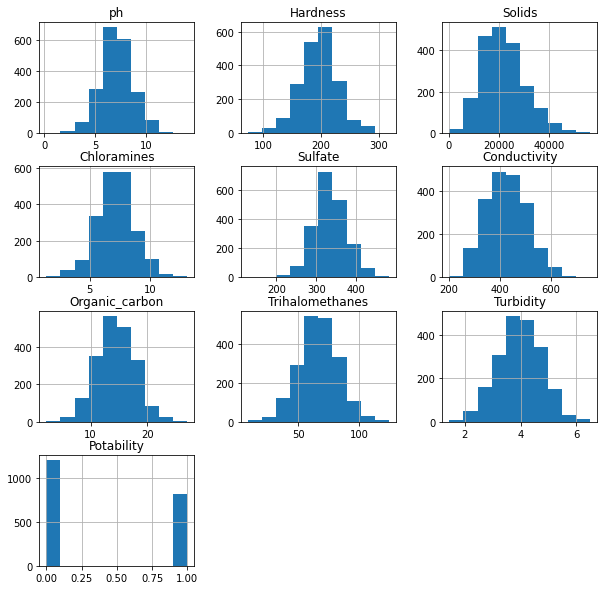

In [ ]:
#histograma de variáveis numéricas
data.hist(figsize=(10,10));

In [ ]:
X = scale(data.drop(columns=['Potability']))
X

array([[ 0.7824658 ,  0.56411376,  0.01168692, ...,  1.22703167,
         2.11165179,  0.84476056],
       [ 1.27546291, -0.45565257, -0.45583491, ..., -0.84215371,
        -2.14039865,  0.13503344],
       [-0.95483488, -0.23461412,  0.7906452 , ..., -1.79234008,
        -0.7144228 , -1.80736621],
       ...,
       [ 2.8004919 , -3.10036538,  1.76750279, ...,  0.54602107,
        -1.5455849 ,  0.51212515],
       [-0.64615977, -0.28531709,  0.48857575, ..., -0.6889287 ,
        -0.3721083 , -0.3845623 ],
       [-1.53717226, -0.07007504,  2.9702871 , ..., -0.139372  ,
         0.01784567,  0.59743748]])

In [ ]:
#Separando colunas para treino
y = data['Potability']
y

3       0
4       0
5       0
6       0
7       0
       ..
3267    1
3268    1
3269    1
3270    1
3271    1
Name: Potability, Length: 2011, dtype: int64

In [ ]:
# Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [ ]:
y_test

1985    1
835     0
232     0
1750    0
1851    0
       ..
2165    0
365     1
725     1
1823    0
1491    1
Name: Potability, Length: 604, dtype: int64

In [ ]:
#Modelo com função de ativação ReLU
model = keras.Sequential(layers.Dense(X.shape[1], activation='relu', input_shape=[X.shape[1]]))


model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 90        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                200       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 168       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 467
Trainable params: 467
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#compilação de modelo com resultado binário: água potável ou não potável
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

In [ ]:
#treinando ...
early_stopping = keras.callbacks.EarlyStopping(
    patience=100,
    min_delta=0.0001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    batch_size=32,
    validation_split=0.3,
    epochs=200,
    callbacks=[early_stopping],
    verbose=1,  
)


Epoch 1/200
31/31 [==============================] - 1s 7ms/step - loss: 0.6811 - binary_accuracy: 0.5732 - val_loss: 0.6766 - val_binary_accuracy: 0.6430
Epoch 2/200
31/31 [==============================] - 0s 3ms/step - loss: 0.6706 - binary_accuracy: 0.6128 - val_loss: 0.6701 - val_binary_accuracy: 0.6383
Epoch 3/200
31/31 [==============================] - 0s 3ms/step - loss: 0.6647 - binary_accuracy: 0.6047 - val_loss: 0.6655 - val_binary_accuracy: 0.6359
Epoch 4/200
31/31 [==============================] - 0s 3ms/step - loss: 0.6601 - binary_accuracy: 0.6128 - val_loss: 0.6639 - val_binary_accuracy: 0.6336
Epoch 5/200
31/31 [==============================] - 0s 2ms/step - loss: 0.6554 - binary_accuracy: 0.6270 - val_loss: 0.6610 - val_binary_accuracy: 0.6265
Epoch 6/200
31/31 [==============================] - 0s 3ms/step - loss: 0.6518 - binary_accuracy: 0.6291 - val_loss: 0.6577 - val_binary_accuracy: 0.6288
Epoch 7/200
31/31 [==============================] - 0s 2ms/step - los

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.681135,0.573171,0.676592,0.643026
1,0.670579,0.612805,0.670096,0.638298
2,0.664651,0.604675,0.665519,0.635934
3,0.660091,0.612805,0.663854,0.633570
4,0.655438,0.627033,0.660953,0.626478


Best Validation Loss: 0.6123
Best Validation Accuracy: 0.6879


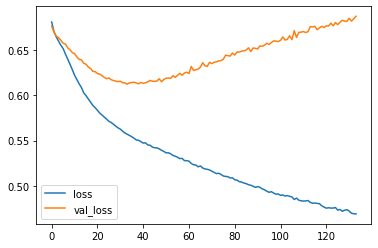

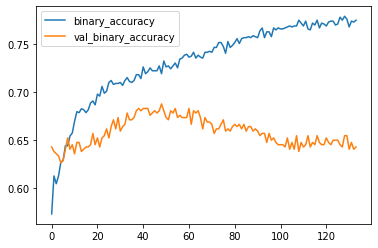

In [ ]:
display_binary_acc_hist(history)

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

19/19 - 0s - loss: 0.6321 - binary_accuracy: 0.6573

Test accuracy: 0.6572847962379456
